# Project: Movie Data Analysis 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this project I wil be analyzing movie data from the Movie Database (TMDb). This dataset includes categories such as popularity, budget, revenue, release year original title, cast, vote count, runtime, genres and others. I will be utilizing some of these columns to analyze this date to answer questions that i found interesting. 

> I will answer the following work questions:

> What factors impact the popularity of a movie?

>How have movies changed over time?

> What variables have the greatest impact on revenue that a movie brings in?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

Below I am getting a view of the datasets first 5 rows and all of its columns after reading in the dataset.

In [3]:
df=pd.read_csv("tmdb_movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


Using shape to get information about how many columns and values the dataset contains.

In [4]:
df.shape

(10866, 21)

Using describe to get statistical information about each category.

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Below is a view of the type of data (string, integer, decimal value) and it gives a view of the missing/null values from each category.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning

Below i am deleting columns that i do not plan on using as a part of my research.

In [7]:
df.drop(['homepage','tagline','overview','imdb_id','id','keywords','revenue_adj','production_companies','budget_adj'],axis=1, inplace=True)


Getting another view of the data and confirming that the deleted columns have actually been removed.

In [8]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/2015,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/2015,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/2015,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/2015,2947,7.3,2015


Getting a updated look at the missing values from each category.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 1018.8+ KB


Looking at how many duplicate values there are in the dataset.

In [10]:
sum(df.duplicated())

1

Below i am deleting any duplicates and then confirming that they were removed. 

In [11]:
df.drop_duplicates(inplace=True)
sum(df.duplicated())


0

Below i am removing any null values and then confirming that they were removed. 

In [12]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 12 columns):
popularity        10731 non-null float64
budget            10731 non-null int64
revenue           10731 non-null int64
original_title    10731 non-null object
cast              10731 non-null object
director          10731 non-null object
runtime           10731 non-null int64
genres            10731 non-null object
release_date      10731 non-null object
vote_count        10731 non-null int64
vote_average      10731 non-null float64
release_year      10731 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 1.1+ MB


Getting a view of how many values and columns there are after removing columns duplicates and null values.

In [13]:
df.shape

(10731, 12)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### What factors impact the popularity of a movie?

Text(0,0.5,'Number')

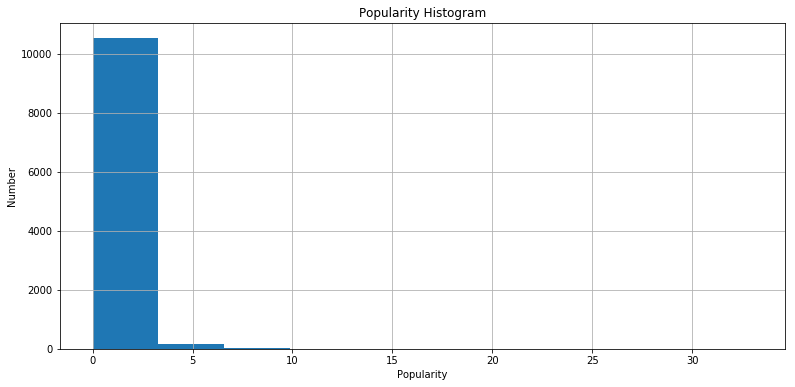

In [14]:
df.popularity.hist(figsize=(13,6))
plt.title('Popularity Histogram')
plt.xlabel('Popularity')
plt.ylabel('Number')

Displaying a histogram of popularity which i will be researching to answer the above question.

Getting the mean values of each category in the dataset

In [15]:
df.mean()

popularity      6.526147e-01
budget          1.480365e+07
revenue         4.031989e+07
runtime         1.024688e+02
vote_count      2.198130e+02
vote_average    5.964710e+00
release_year    2.001260e+03
dtype: float64

Quering runtime data based off the mean. 

In [16]:
low_runtime=df.query('runtime<1.02')
high_runtime=df.query('runtime >=1.02')

Getting the mean value of low and high runtime and popularity below

In [17]:
low_runtime['popularity'].mean()

0.192495

In [18]:
high_runtime['popularity'].mean()

0.6538184480052323

#### Function to create bar chart based on parameters.

In [64]:
def bar_chart():
    chart=plt.bar(locations, heights, tick_label=labels, color=colors)
    return chart

Plotting a bar chart showing average popularity based on the runtime by calling bar_chart function. 
This shows that there is a coorilation between runtime and popularity. 
Movies with a higher runtime tend to be more popular movies.

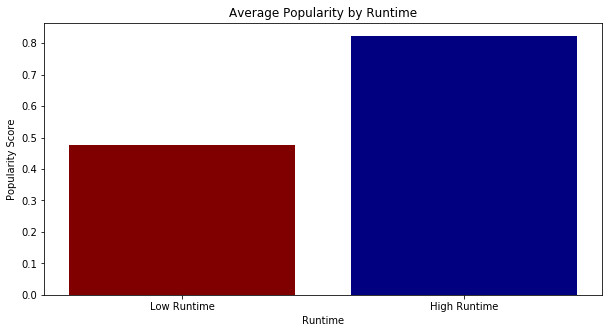

In [71]:
median = df['runtime'].median()
low_runtime = df.query('runtime < {}'.format(median))
high_runtime = df.query('runtime >= {}'.format(median))

mean_pop_low = low_runtime['popularity'].mean()
mean_pop_high = high_runtime['popularity'].mean()
locations = [1, 2]
colors =['maroon','navy']
plt.rcParams["figure.figsize"] = (10, 5)
heights = [mean_pop_low, mean_pop_high]
labels = ['Low Runtime', 'High Runtime']
barchart=bar_chart()
plt.title('Average Popularity by Runtime')
plt.xlabel('Runtime')
plt.ylabel('Popularity Score');

In [21]:
low_budget=df.query('budget<1.48')
high_budget=df.query('budget >=1.48')

In [22]:
low_budget['popularity'].mean()

0.33637385238265854

In [23]:
high_budget['popularity'].mean()

0.9954495756457565

Plotting a bar chart showing average popularity based on the budget. 
Calling bar_chart function to create chart based on parameters coded.
This shows that there is a coorilation between budget and popularity. 
Movies with a higher budget tend to be more popular movies.

In [24]:
median = df['budget'].mean()
low_budget = df.query('budget < {}'.format(median))
high_budget = df.query('budget >= {}'.format(median))

mean_pop_low_budget = low_budget['popularity'].mean()
mean_pop_high_budget = high_budget['popularity'].mean()

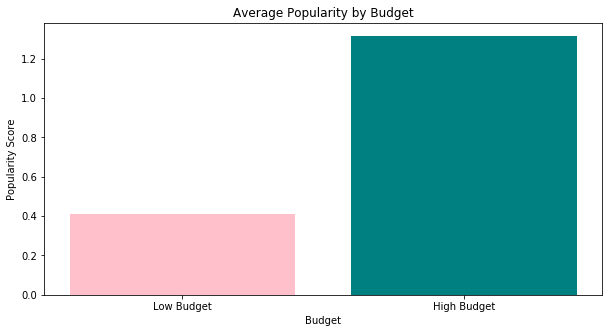

In [72]:
locations = [1, 2]
colors =['pink','teal']
heights = [mean_pop_low_budget, mean_pop_high_budget]
labels = ['Low Budget', 'High Budget']
barchart=bar_chart()
plt.title('Average Popularity by Budget')
plt.xlabel('Budget')
plt.ylabel('Popularity Score');


Plotting a bar chart showing average popularity based on the revenue. 
This shows that there is a coorilation between revenue and popularity. 
More popular movies generate more revenue. 

In [69]:
median = df['revenue'].mean()
low_revenue = df.query('revenue < {}'.format(median))
high_revenue = df.query('revenue >= {}'.format(median))

mean_pop_low_revenue = low_revenue['popularity'].mean()
mean_pop_high_revenue = high_revenue['popularity'].mean()

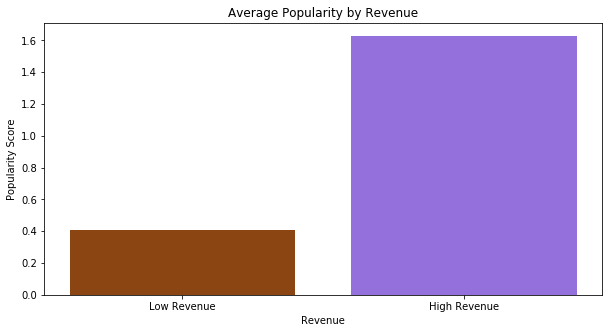

In [73]:
locations = [1, 2]
colors =['saddlebrown','mediumpurple']
heights = [mean_pop_low_revenue, mean_pop_high_revenue]
labels = ['Low Revenue', 'High Revenue']
barchart=bar_chart()
plt.title('Average Popularity by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Popularity Score');

Average popularity based on high and low revenue.

In [58]:
low_revenue['popularity'].mean()

0.40751406029154513

In [59]:
high_revenue['popularity'].mean()

1.6274469582560296

Below is a bar chart that shows all 3 of the above charts which gives a clearer picture of which categories offer the largest and smallest coorilation to popularity. Chart is made by calling bar_chart function.

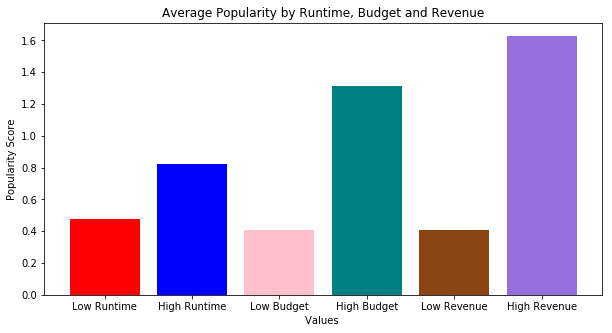

In [74]:
locations = [1, 2, 3, 4, 5 ,6]
colors =['red','blue', 'pink','teal', 'saddlebrown','mediumpurple']
heights = [mean_pop_low, mean_pop_high, mean_pop_low_budget, mean_pop_high_budget, mean_pop_low_revenue, mean_pop_high_revenue]
labels = ['Low Runtime', 'High Runtime', 'Low Budget', 'High Budget','Low Revenue', 'High Revenue']
barchart=bar_chart()
plt.title('Average Popularity by Runtime, Budget and Revenue')
plt.xlabel('Values ')
plt.ylabel('Popularity Score');

Below i have created a pie chart showing the percentages of each categor that are based on the popularity of a movie. 
It is clear that higher budget and revenue have a big impact on the popularity of a movie and movies with a low budget and low revenue are equally the leastpopular movies. 

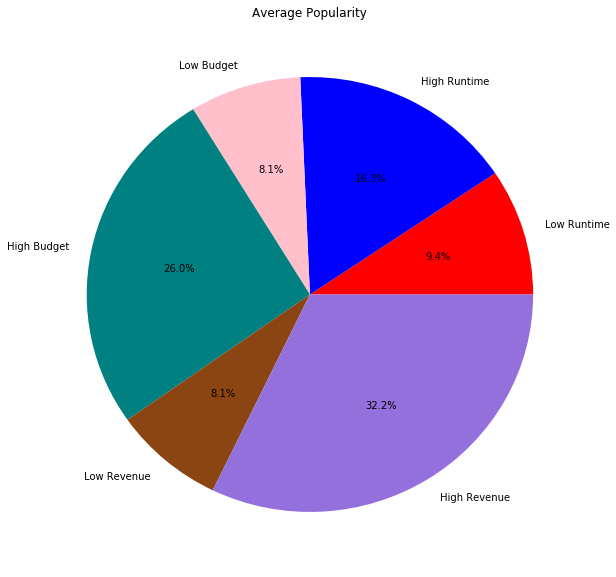

In [29]:
pie_values = np.array([mean_pop_low, mean_pop_high, mean_pop_low_budget, mean_pop_high_budget, mean_pop_low_revenue, mean_pop_high_revenue])
pie_labels = ['Low Runtime', 'High Runtime', 'Low Budget', 'High Budget','Low Revenue', 'High Revenue']
pie_colors =['red','blue', 'pink','teal', 'saddlebrown','mediumpurple']
plt.rcParams["figure.figsize"] = (10, 10)
plt.pie(pie_values, labels = pie_labels, colors=pie_colors,autopct='%1.1f%%')
plt.title('Average Popularity');

### How did movie trends change overtime?

Histogram of the release year category.

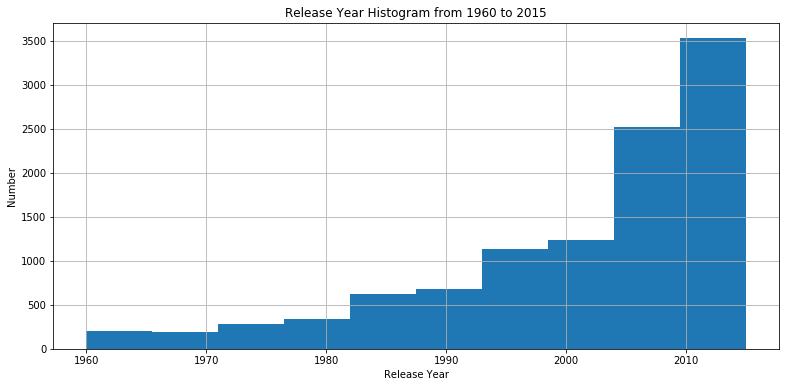

In [90]:
df.release_year.hist(figsize=(13,6));
plt.title('Release Year Histogram from 1960 to 2015')
plt.xlabel('Release Year')
plt.ylabel('Number');

Statistical data for how many movies were released per year

In [31]:
df.groupby('release_year')['original_title'].count()

release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     38
1968     38
1969     30
1970     40
1971     55
1972     40
1973     55
1974     46
1975     44
1976     47
1977     56
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    104
1985    108
1986    120
1987    124
1988    142
1989    135
1990    132
1991    133
1992    132
1993    177
1994    184
1995    174
1996    203
1997    191
1998    210
1999    224
2000    224
2001    241
2002    264
2003    281
2004    307
2005    361
2006    404
2007    432
2008    486
2009    525
2010    475
2011    532
2012    574
2013    649
2014    682
2015    617
Name: original_title, dtype: int64

Below is a line chart showing the trend of the total movies from the data set from 1960 to 2015.
The amount of movies per year has stradily climbed since 1960.

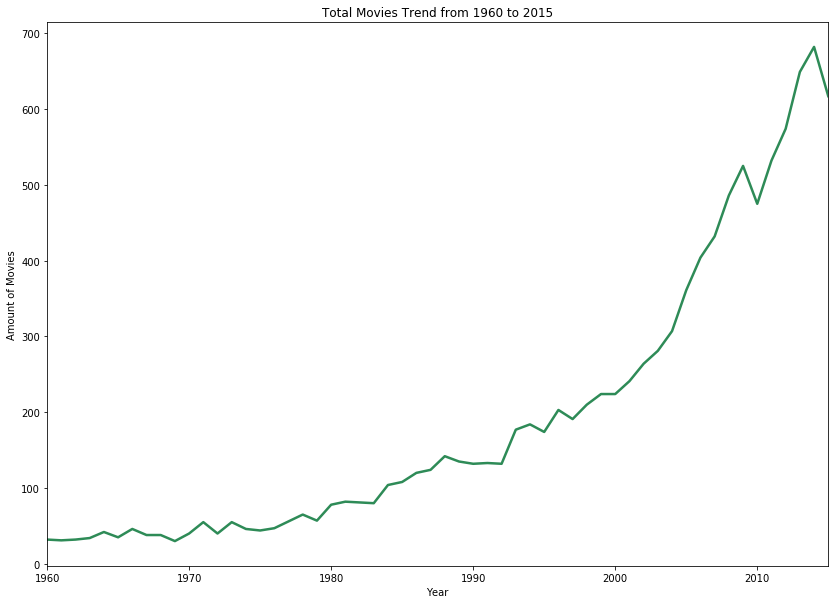

In [82]:
movie_amounts_trend= df.groupby('release_year')['original_title'].count().plot(figsize=(14, 10), color='seagreen',linewidth=2.5)
plt.title('Total Movies Trend from 1960 to 2015')
plt.xlabel('Year')
plt.ylabel('Amount of Movies');

This is a bar chart that gives a clearer picture of the amount of movies produced per year from 1960 to 2015. 
There are more movies being produced on a year to year basis.

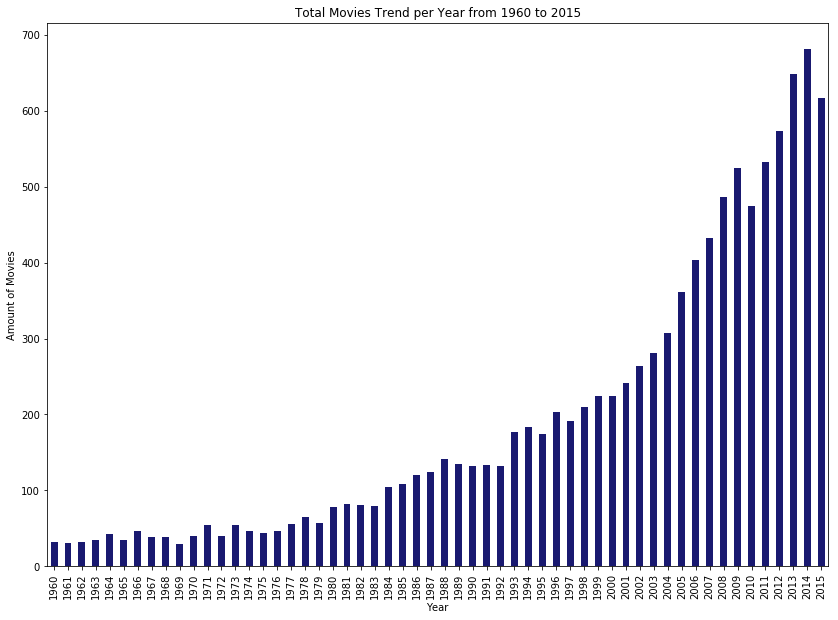

In [83]:
movie_amounts_trend= df.groupby('release_year')['original_title'].count().plot(kind='bar',figsize=(14, 10), color='midnightblue',linewidth=2.5)
plt.title('Total Movies Trend per Year from 1960 to 2015')
plt.xlabel('Year')
plt.ylabel('Amount of Movies');

Statistical data showing average budget each year 

In [34]:
df.groupby('release_year')['budget'].mean()

release_year
1960    6.892796e+05
1961    1.488290e+06
1962    1.710066e+06
1963    2.156809e+06
1964    9.400753e+05
1965    2.005860e+06
1966    1.251191e+06
1967    2.648737e+06
1968    1.893132e+06
1969    1.404303e+06
1970    3.174049e+06
1971    1.381764e+06
1972    9.069813e+05
1973    1.185287e+06
1974    1.673261e+06
1975    1.279068e+06
1976    2.598936e+06
1977    2.885357e+06
1978    3.215339e+06
1979    4.470421e+06
1980    4.647436e+06
1981    4.558022e+06
1982    5.404877e+06
1983    6.488843e+06
1984    7.011654e+06
1985    6.932598e+06
1986    5.871113e+06
1987    5.721418e+06
1988    6.498930e+06
1989    7.997455e+06
1990    9.772137e+06
1991    1.102431e+07
1992    1.089216e+07
1993    1.005440e+07
1994    1.211526e+07
1995    1.647060e+07
1996    1.816277e+07
1997    2.487480e+07
1998    2.142695e+07
1999    2.573766e+07
2000    2.568170e+07
2001    2.341056e+07
2002    2.231682e+07
2003    2.220590e+07
2004    2.335616e+07
2005    2.034151e+07
2006    1.807892e+07


Below is a line chart showing a trend of budgets from 1960 to 2015.
Budgets have grown significately from around 1975 to 2000 and started a strong downward trend after the year 2000

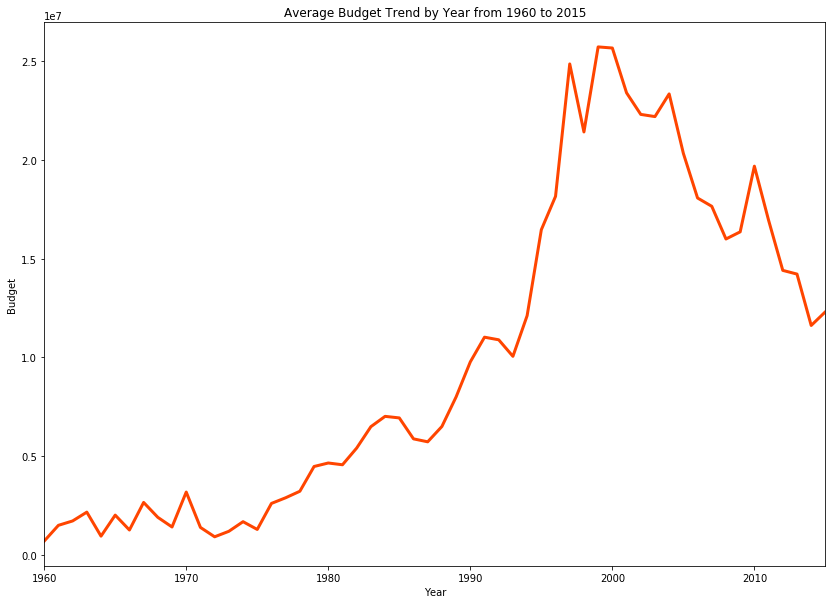

In [84]:
budget_trend= df.groupby('release_year')['budget'].mean()
budget_trend_plot = budget_trend.plot(figsize=(14, 10), color='orangered',linewidth=3.0)
plt.title('Average Budget Trend by Year from 1960 to 2015')
plt.xlabel('Year')
plt.ylabel('Budget');

This is a bar chart that gives a clearer picture of the average budget per movie on a year to year basis from 1960 to 2015. Budgets climbing till the year 2000 was expected but i found it interesting that budgets have been trending down over the last 15 years of the data set. I expected them to continue to climb. 

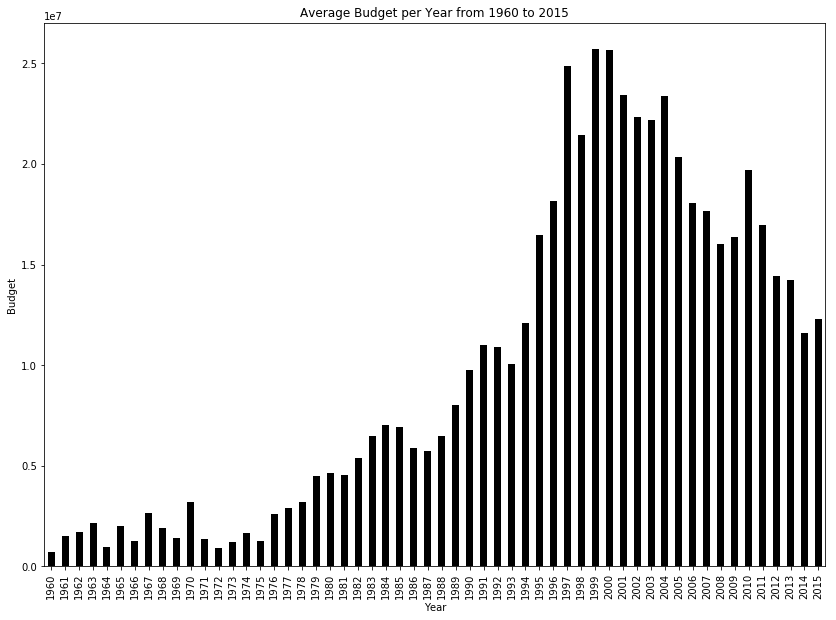

In [85]:
budget_overtime=df.groupby('release_year').budget.mean()
budget_bar=budget_overtime.plot(kind='bar',figsize=(14,10), color='black');
plt.title('Average Budget per Year from 1960 to 2015')
plt.xlabel('Year')
plt.ylabel('Budget');

Average revenue per year using groupby

In [37]:
df.groupby('release_year')['revenue'].mean()

release_year
1960    4.531406e+06
1961    1.089420e+07
1962    6.736870e+06
1963    5.511911e+06
1964    8.118614e+06
1965    1.308805e+07
1966    1.842102e+06
1967    1.941670e+07
1968    6.966657e+06
1969    8.131903e+06
1970    1.400555e+07
1971    7.362011e+06
1972    1.236825e+07
1973    2.225420e+07
1974    1.766391e+07
1975    2.176114e+07
1976    1.704267e+07
1977    3.893898e+07
1978    2.107353e+07
1979    2.955781e+07
1980    2.267516e+07
1981    2.164154e+07
1982    3.035116e+07
1983    2.884412e+07
1984    2.534158e+07
1985    2.662752e+07
1986    2.502315e+07
1987    2.792020e+07
1988    2.633072e+07
1989    3.825869e+07
1990    4.026641e+07
1991    3.538797e+07
1992    4.604662e+07
1993    3.929464e+07
1994    3.856212e+07
1995    5.262265e+07
1996    4.094331e+07
1997    5.578625e+07
1998    4.520559e+07
1999    5.069515e+07
2000    4.901206e+07
2001    5.564350e+07
2002    5.546820e+07
2003    5.387275e+07
2004    5.470301e+07
2005    4.575301e+07
2006    4.028648e+07


Below is a Line chart that shows a trend line of how the average revenue per movie has trended from 1960 to 2015.
It shows that while somewhat choppy revenue has grown steadily and peaked around 2000.
I was expecting revenue to continue to grown over time.

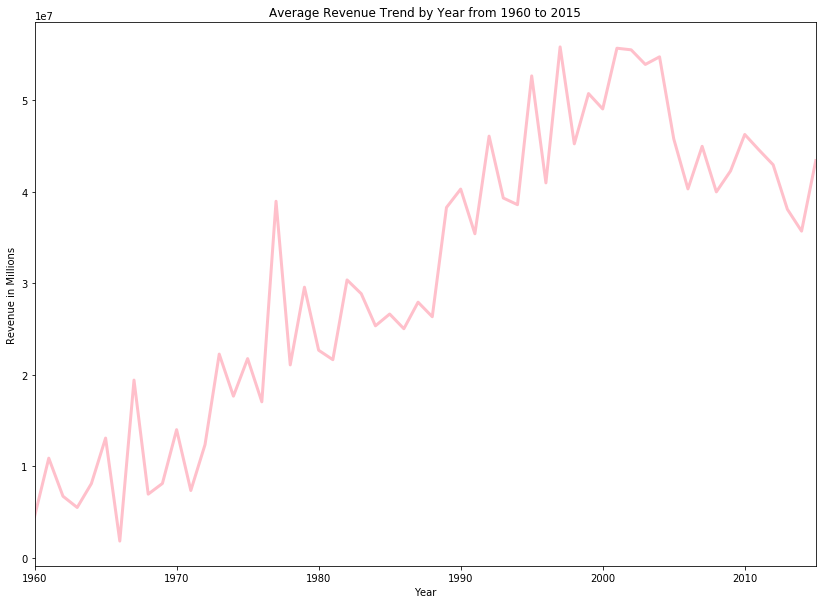

In [86]:
profit_trend= df.groupby('release_year')['revenue'].mean()
profit_trend_plot = profit_trend.plot(figsize=(14, 10), color='pink',linewidth=3.0)
plt.title('Average Revenue Trend by Year from 1960 to 2015')
plt.xlabel('Year')
plt.ylabel('Revenue in Millions');

This is a bar chart that shows the average revenue produced per movie on a yearly basis from 1960 to 2015.
The climb of revenue until the early 2000s was expected and i found it interesting that revenue started to trend downward after that. 
Although it does make sense to me that this would happen as many streaming services being avalable could make less people feel the need to go to the movies therefore dropping the revenue produced. 

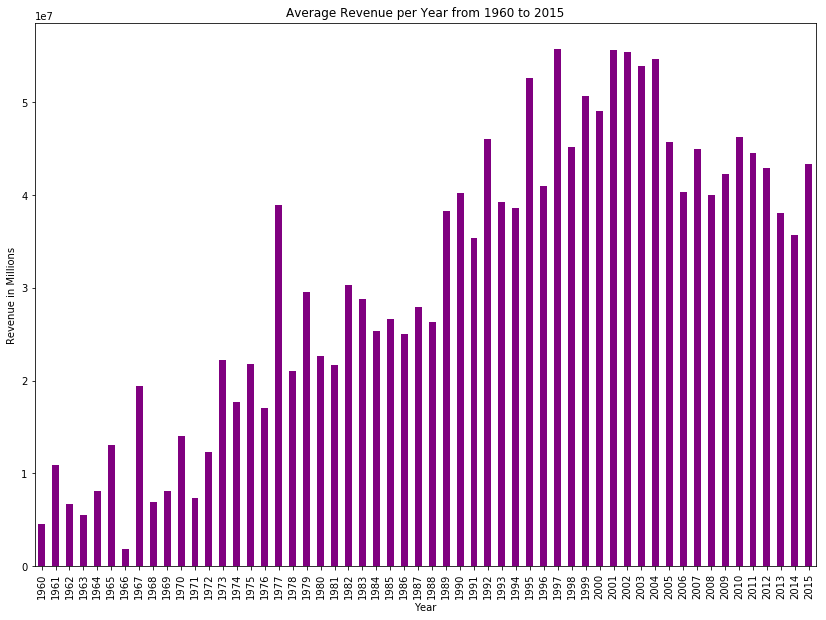

In [87]:
revenue_overtime=df.groupby('release_year').revenue.mean()
revenue_bar=revenue_overtime.plot(kind='bar',figsize=(14,10), color='purple');
plt.title('Average Revenue per Year from 1960 to 2015')
plt.xlabel('Year')
plt.ylabel('Revenue in Millions');

Average popularity per year

In [40]:
df.groupby('release_year')['popularity'].mean()

release_year
1960    0.458932
1961    0.422827
1962    0.454783
1963    0.502706
1964    0.412428
1965    0.342587
1966    0.304112
1967    0.489084
1968    0.495726
1969    0.436779
1970    0.341638
1971    0.448112
1972    0.449054
1973    0.494462
1974    0.453760
1975    0.519445
1976    0.474516
1977    0.637528
1978    0.413314
1979    0.589312
1980    0.495652
1981    0.442413
1982    0.543353
1983    0.541445
1984    0.590301
1985    0.589466
1986    0.511238
1987    0.506663
1988    0.472000
1989    0.567816
1990    0.535735
1991    0.501090
1992    0.583376
1993    0.549475
1994    0.668825
1995    0.714641
1996    0.606398
1997    0.714033
1998    0.626165
1999    0.645799
2000    0.552952
2001    0.705034
2002    0.705411
2003    0.719083
2004    0.722438
2005    0.632187
2006    0.609710
2007    0.598488
2008    0.594700
2009    0.607770
2010    0.660137
2011    0.682350
2012    0.618454
2013    0.635676
2014    0.907467
2015    1.047620
Name: popularity, dtype: float64

Line chart showing the trend of popularity from 1960 to 2015.
Popularity has contiunred to trend upwared which makes sense to me as there are more and more people in the world every year. I do find the steep upward trend the last few years 

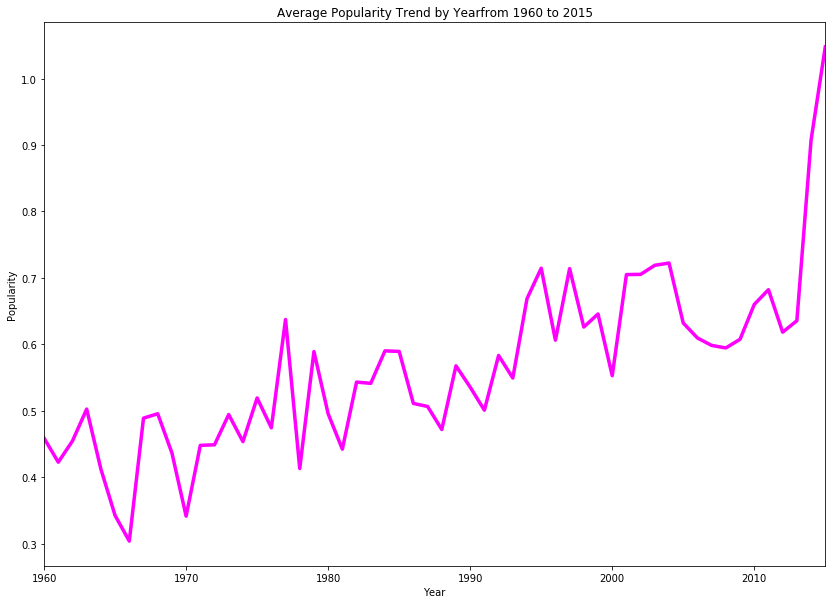

In [88]:
popularity_trend= df.groupby('release_year')['popularity'].mean()
popularity_trend_plot = popularity_trend.plot(figsize=(14, 10), color='magenta', linewidth=3.5)
plt.title('Average Popularity Trend by Yearfrom 1960 to 2015')
plt.xlabel('Year')
plt.ylabel('Popularity');

A bar graph showing popularity each year. Its clear that popularity is steadily increasing. This view is shows a more clear trend and it makes it clear that the last two years are largely higher. 
I would be intersted to see data until 2023 to see if 2015 and 2014 are outliers. 

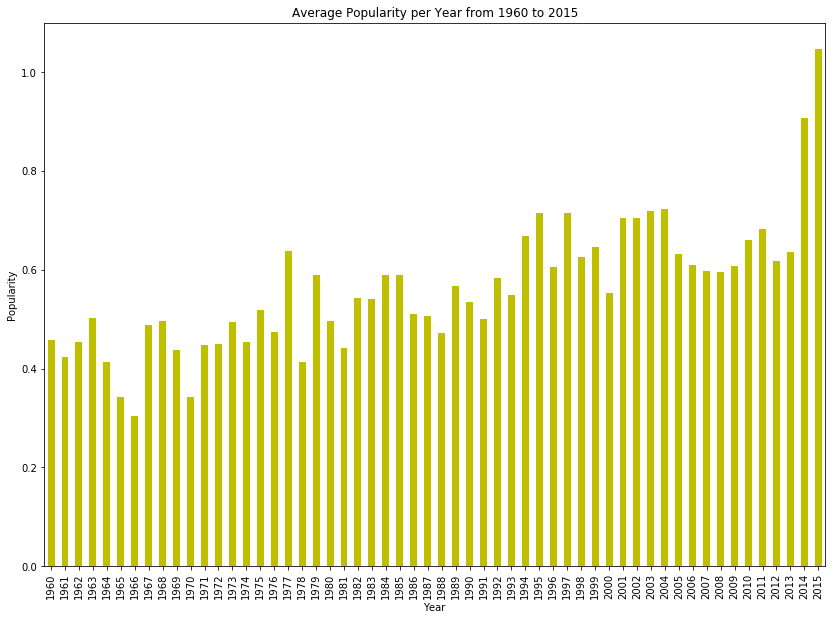

In [89]:
popularity_overtime=df.groupby('release_year').popularity.mean()
popularity_bar=popularity_overtime.plot(kind='bar',figsize=(14,10), color='y')
plt.title('Average Popularity per Year from 1960 to 2015')
plt.xlabel('Year')
plt.ylabel('Popularity');

## What variables have the greatest impact on revenue that a movie brings in?

Below is a histogram of the revenue category.

Text(0,0.5,'Number')

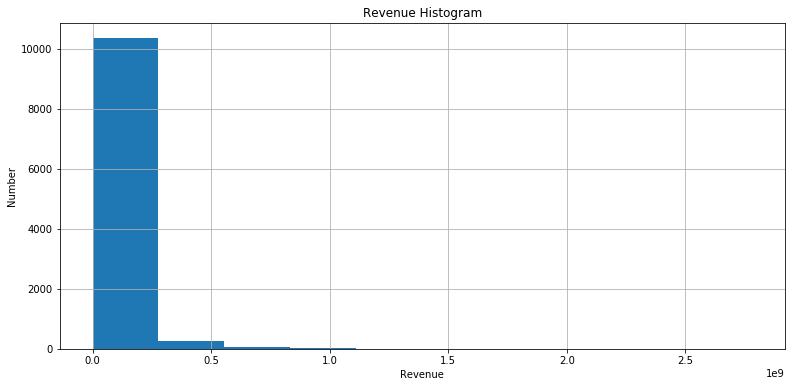

In [92]:
df.revenue.hist(figsize=(13,6));
plt.title('Revenue Histogram')
plt.xlabel('Revenue')
plt.ylabel('Number')

Below is a bar chart comparing average revenue based on the popularity of a movie. 
Chart is created by calling to bar_chart function.
It is very clear that there is a major positive coorilation between popularity of a movie and how much revenue it produces.
I found this to be somewhat predictable as more people will go to see more popular movies which will increase the revenue. 



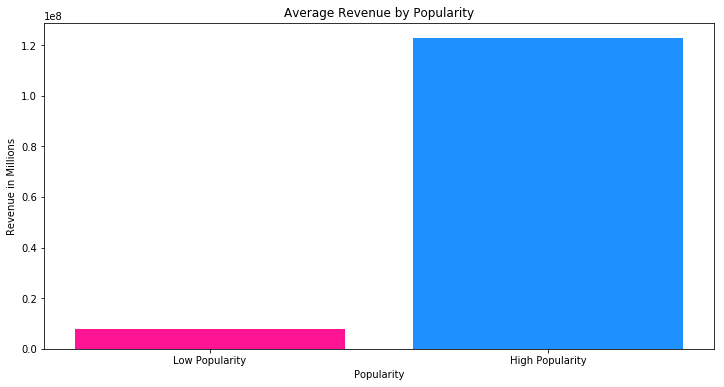

In [93]:
median = df['popularity'].mean()
low_popularity = df.query('popularity < {}'.format(median))
high_popularity = df.query('popularity >= {}'.format(median))
plt.rcParams["figure.figsize"] = (12, 6)
mean_rev_low_pop = low_popularity['revenue'].mean()
mean_rev_high_pop = high_popularity['revenue'].mean()
locations = [1, 2]
colors =['deeppink','dodgerblue']
heights = [mean_rev_low_pop, mean_rev_high_pop]
labels = ['Low Popularity', 'High Popularity']
barchart=bar_chart()
plt.title('Average Revenue by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Revenue in Millions');

Average revenue based on low and high popularity

In [47]:
high_popularity['revenue'].mean()

122706800.08608179

In [48]:
low_popularity['revenue'].mean()

7874489.6539810365

This is a bar chart comparing the average Revenue based on the ratings of the movie. 
Chart is created by calling to bar_chart function.
Its clear that movies that got higher than average ratings were able to generate about 3 million dollars more in revenue. 

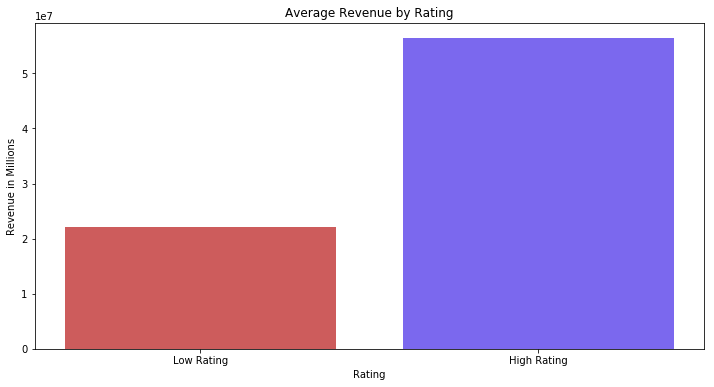

In [94]:
median = df['vote_average'].mean()
low_vote = df.query('vote_average < {}'.format(median))
high_vote = df.query('vote_average >= {}'.format(median))
mean_rev_low_vote = low_vote['revenue'].mean()
mean_rev_high_vote = high_vote['revenue'].mean()
locations = [1, 2]
colors =['indianred','mediumslateblue']
heights = [mean_rev_low_vote, mean_rev_high_vote]
labels = ['Low Rating', 'High Rating']
barchart=bar_chart()
plt.title('Average Revenue by Rating')
plt.xlabel('Rating')
plt.ylabel('Revenue in Millions');

Average revenue based on low and high rating

In [50]:
high_vote['revenue'].mean()

56388909.746271275

In [52]:
low_vote['revenue'].mean()

22120889.718402226

This is a bar chart of the average revenue produced based off the budget. 
It is clear that the higher the budget the more revenue it will be able to produce. 
Chart is created by calling to bar_chart function.
Low budget movies dont produce much revenue at all. 
I found this to be pretty acurate to what i had predicted, as big budget movies are always the ones in theators while low budget movies often do not make it to the big theators. 

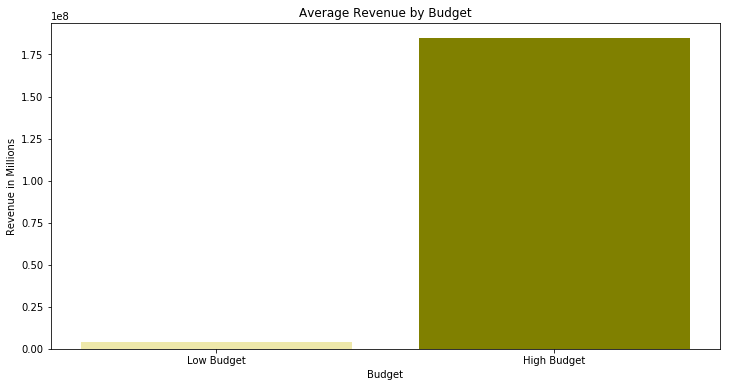

In [95]:
median = df['budget'].mean()
low_budget = df.query('budget < {}'.format(median))
high_budget = df.query('budget >= {}'.format(median))
mean_rev_low_budget = low_revenue['revenue'].mean()
mean_rev_high_budget = high_revenue['revenue'].mean()
locations = [1, 2]
colors =['palegoldenrod','olive']
heights = [mean_rev_low_budget, mean_rev_high_budget]
labels = ['Low Budget', 'High Budget']
barchart=bar_chart()
plt.title('Average Revenue by Budget')
plt.xlabel('Budget')
plt.ylabel('Revenue in Millions');

Average revenue based on low and high budget.

In [54]:
high_budget['revenue'].mean()

129062124.00380887

In [56]:
low_budget['revenue'].mean()

7642649.443325258

Below is a chart of all of the 3 charts above. 
This makes it clear to see that budget has by far the greatest impact on the amount of revenue a movie will produce. The high budget movies produce more revenue than any other category and the low budget movies produce the lowest revenue of any other category.
Chart is created by calling to bar_chart function.

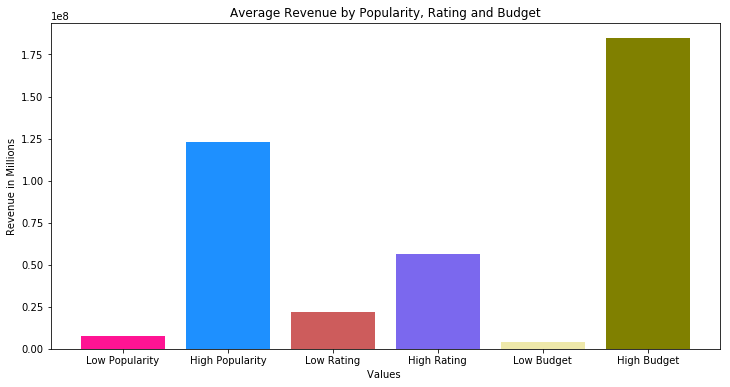

In [96]:
locations = [1, 2, 3, 4, 5 ,6]
colors =['deeppink','dodgerblue', 'indianred','mediumslateblue', 'palegoldenrod','olive']
heights = [mean_rev_low_pop, mean_rev_high_pop, mean_rev_low_vote, mean_rev_high_vote, mean_rev_low_budget, mean_rev_high_budget]
labels = ['Low Popularity', 'High Popularity', 'Low Rating', 'High Rating','Low Budget', 'High Budget']
barchart=bar_chart()
plt.title('Average Revenue by Popularity, Rating and Budget')
plt.xlabel('Values ')
plt.ylabel('Revenue in Millions');

Below is a pie chart showing percentages based from 100% of the correleation based on averages of each category. Gives a different view of the bar chart above using percentages. 

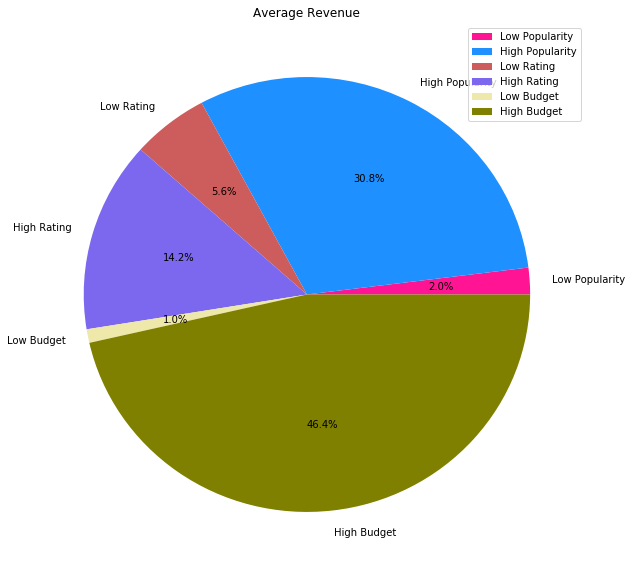

In [79]:
pie_values = np.array([mean_rev_low_pop, mean_rev_high_pop, mean_rev_low_vote, mean_rev_high_vote, mean_rev_low_budget, mean_rev_high_budget])
pie_labels = ['Low Popularity', 'High Popularity', 'Low Rating', 'High Rating','Low Budget', 'High Budget']
pie_colors =['deeppink','dodgerblue', 'indianred','mediumslateblue', 'palegoldenrod','olive']
plt.rcParams["figure.figsize"] = (10, 10)
plt.pie(pie_values, labels = pie_labels, colors=pie_colors,autopct='%1.1f%%')
plt.title('Average Revenue')
plt.legend();

<a id='conclusions'></a>
## Conclusions
In this project I researched how movie trends changed over the years, what impacts revenue and popularity. 
I found that there are more movies being produced on a year to year basis. 
Revenue, budget and popularity have all increased over time as well but budgets are on a downward trend which i found interesting. Additional reaseach could be done compairing a couple specific years together. 

From exploring relationships with revenue i found that budget has by far the greatest impact on the amount of revenue a movie will produce. The high budget movies produce more revenue than any other category and the low budget movies produce the lowest revenue of any other category. Additional research could be done by viewing different relationships with the amount of revenue and other categories from the dataset.  

In researching relationships with popularity i found that revenue, budget, and even the runtime of a movie all had a positive relationship with popularity as with all 3 of these categories the higher the runtime, budget or revenue related to higher popularity. 
High revenue had the highest coorilation with high popularity. 
Additional research could be done compairing popularity to other categories such as genre, actor, or prodcution company. 

#### Limitation
There is missing data from the dataset. 
There is also a limitation of categories, having extra categories would allow for more variables to explore. 
Another limitation is the timeframe of the data. It would be benifitial to be able to explore date that was up to date, as the data only goes out to the year 2015. 


In [97]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0